# Customer Segmentation - Exploratory Data Analysis (EDA)

This notebook performs an exploratory analysis of customer data from a marketing campaign. The goal is to identify meaningful patterns in demographics, income, spending, and response behavior to prepare the data for clustering.

## Step 1: Data Overview

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("marketing_campaign.xlsx")
df.shape, df.dtypes


((2240, 29),
 ID                              int64
 Year_Birth                      int64
 Education                      object
 Marital_Status                 object
 Income                        float64
 Kidhome                         int64
 Teenhome                        int64
 Dt_Customer            datetime64[ns]
 Recency                         int64
 MntWines                        int64
 MntFruits                       int64
 MntMeatProducts                 int64
 MntFishProducts                 int64
 MntSweetProducts                int64
 MntGoldProds                    int64
 NumDealsPurchases               int64
 NumWebPurchases                 int64
 NumCatalogPurchases             int64
 NumStorePurchases               int64
 NumWebVisitsMonth               int64
 AcceptedCmp3                    int64
 AcceptedCmp4                    int64
 AcceptedCmp5                    int64
 AcceptedCmp1                    int64
 AcceptedCmp2                    int64
 Complain   

In [2]:
# Feature Engineering: Total_Spent
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spent
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,605.798214
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,68.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,396.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1045.500000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,602.249288


## Step 2: Missing Values and Duplicate Check

In [6]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


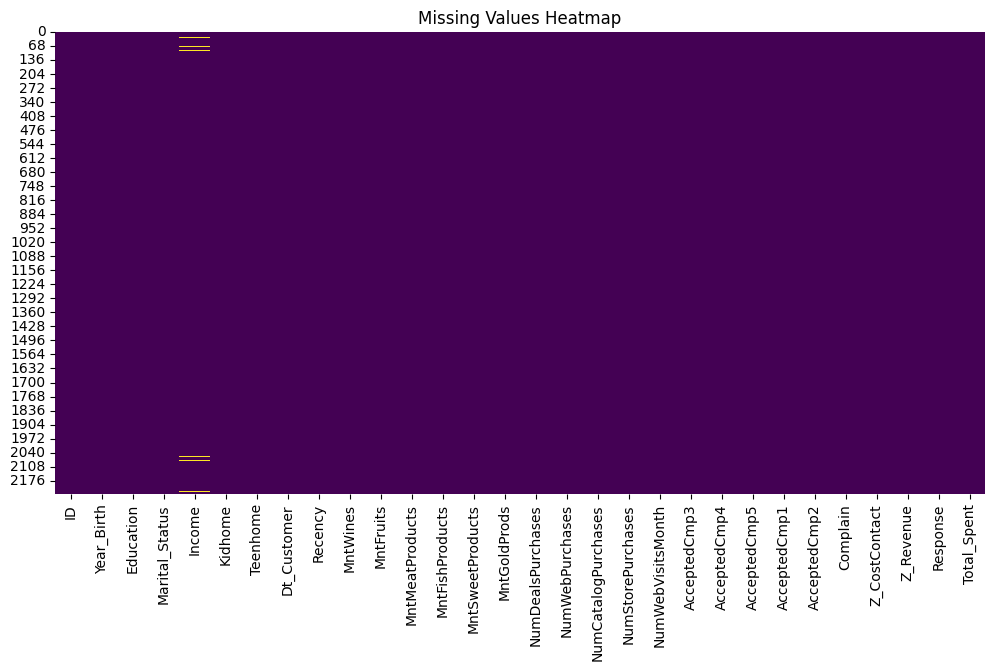

In [7]:

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


**Observation:**

- Missing values are present only in the `Income` column and should be imputed or handled.
- No duplicate records were found in the dataset.

In [8]:
df.duplicated().sum()

np.int64(0)

## Step 3: Univariate Analysis

### Focused Distribution Plots
Here are a few key variable distributions visualized clearly.

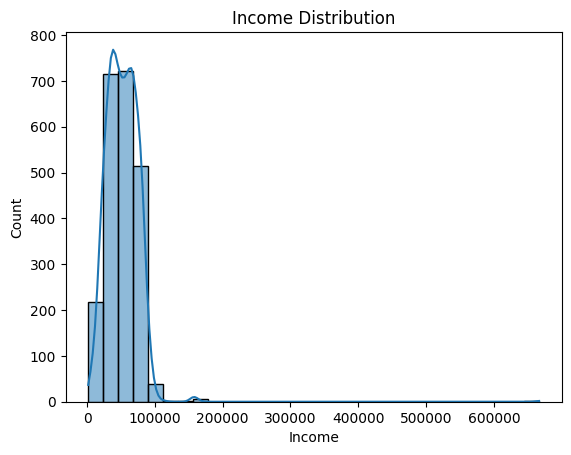

In [9]:
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.show()

**Observation:**

- Income distribution is right-skewed.
- Most customers earn less than ₹100,000.

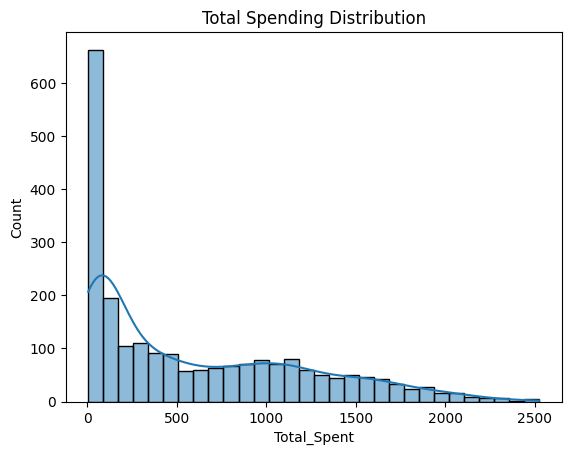

In [10]:
sns.histplot(df['Total_Spent'], bins=30, kde=True)
plt.title('Total Spending Distribution')
plt.show()

**Observation:**

- Spending on wines and meat products shows variability.
- A large portion of customers spend below ₹1000 in most categories.

**Observation:**

- Customers tend to spend more on wines and meat than other product categories.

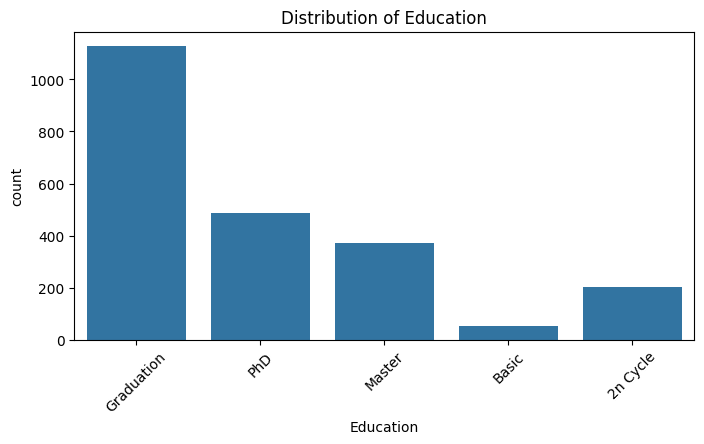

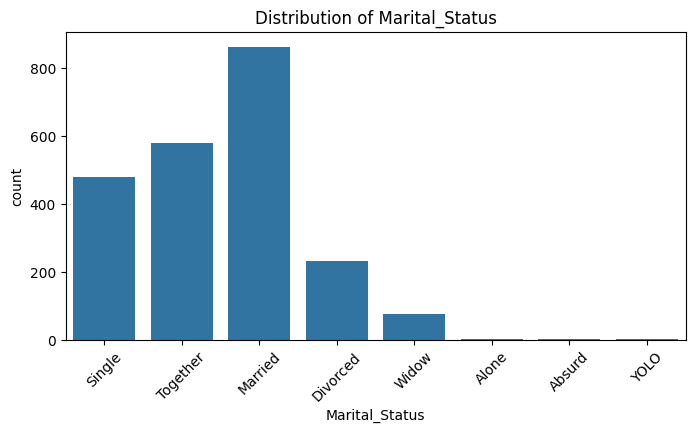

In [11]:

# Categorical features
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()


**Observation:**

- Spending on gold products and sweet products is relatively low for most customers.

## Step 4: Bivariate and Multivariate Analysis

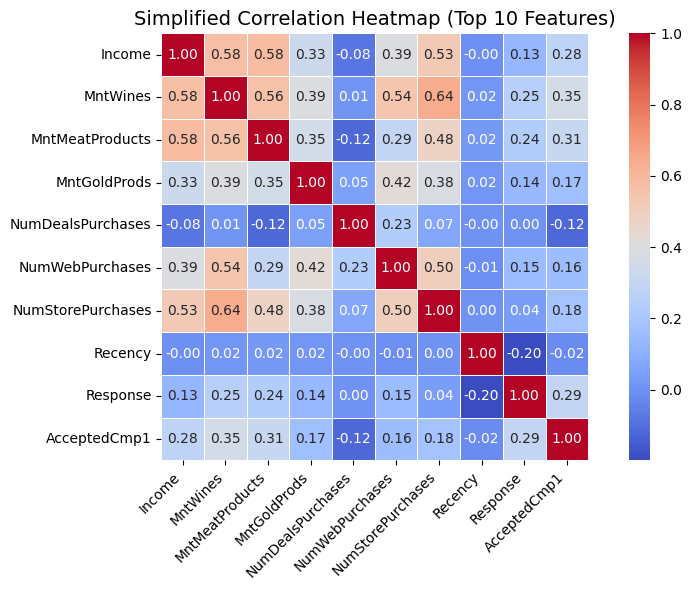

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

# Define only key relevant columns
key_columns = ['Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds',
               'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases',
               'Recency', 'Response', 'AcceptedCmp1']

# Generate correlation matrix for these columns only
corr_matrix = df[key_columns].corr()

plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5,
            cbar=True, square=True)
plt.title("Simplified Correlation Heatmap (Top 10 Features)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Observation:**

This heatmap shows the relationships between key numerical variables:
- `Income` is positively correlated with spending on wine, meat, and gold products.
- `Recency` is negatively correlated with most spending behaviors.
- Customers who recently purchased tend to spend more.

**Observation:**

- Higher income individuals are more likely to respond to campaigns.
- There is a trend between purchase behavior and response rates.

## Step 5: Outlier Detection using Z-Score

In [13]:
numerical_cols = df.select_dtypes(include='number').columns

In [14]:

from scipy.stats import zscore

z_scores = df[numerical_cols].apply(zscore)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_clean = df[filtered_entries]
df_clean.shape


/usr/local/lib/python3.12/dist-packages/pandas/core/apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


(0, 30)

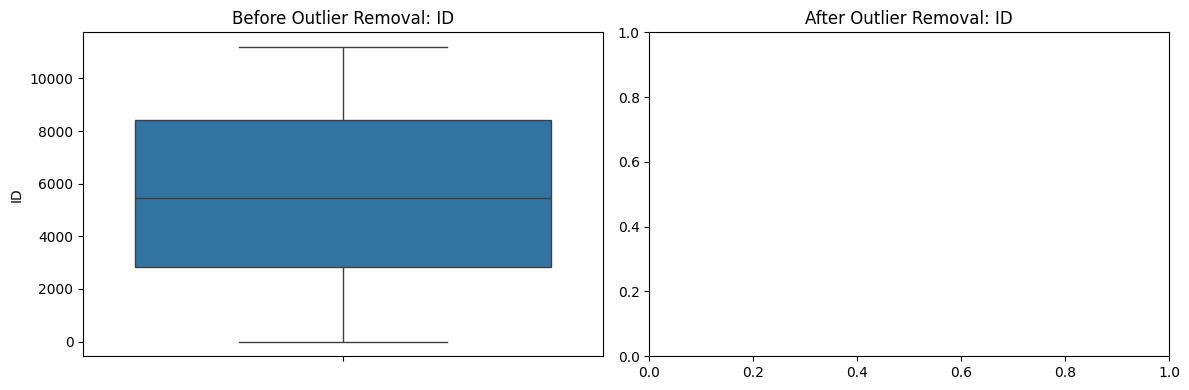

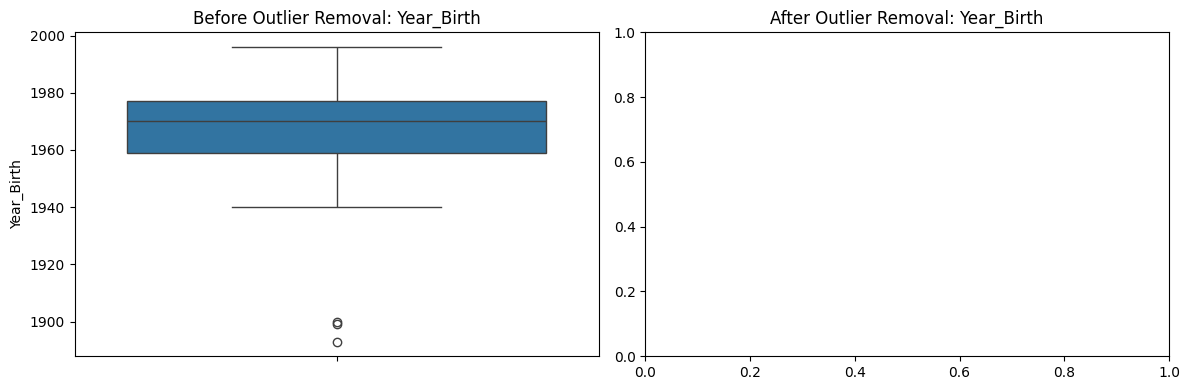

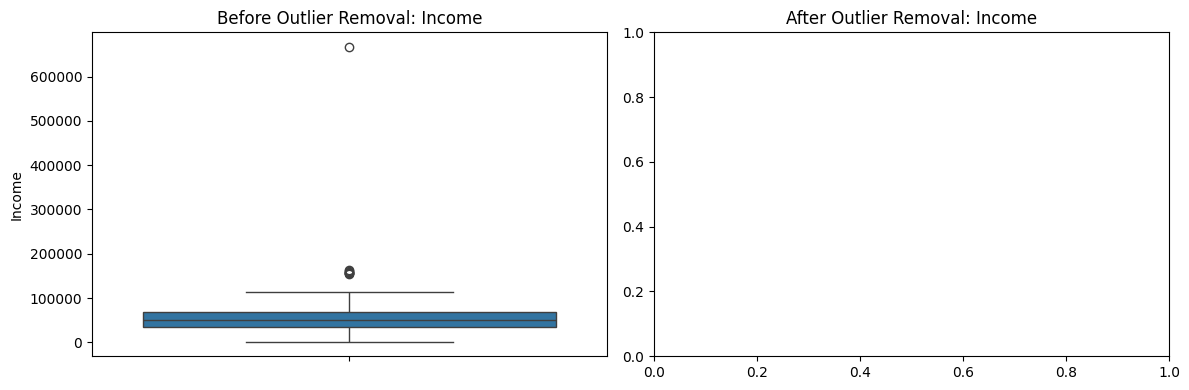

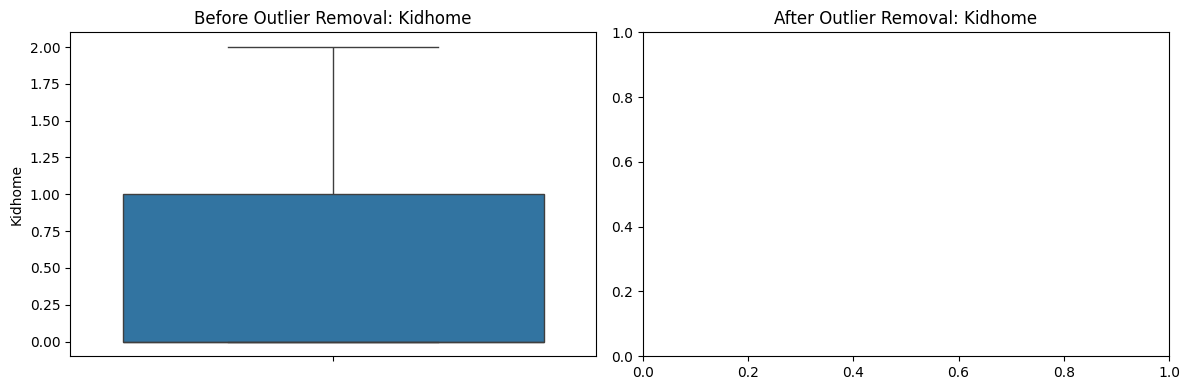

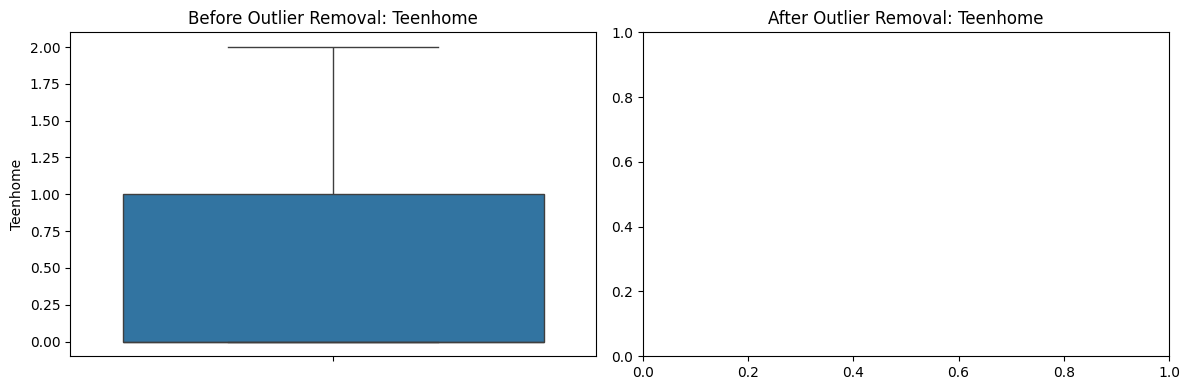

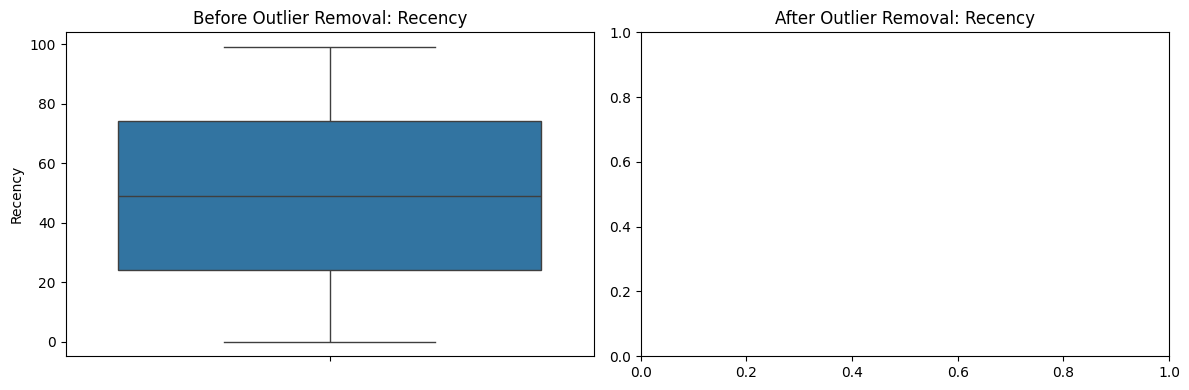

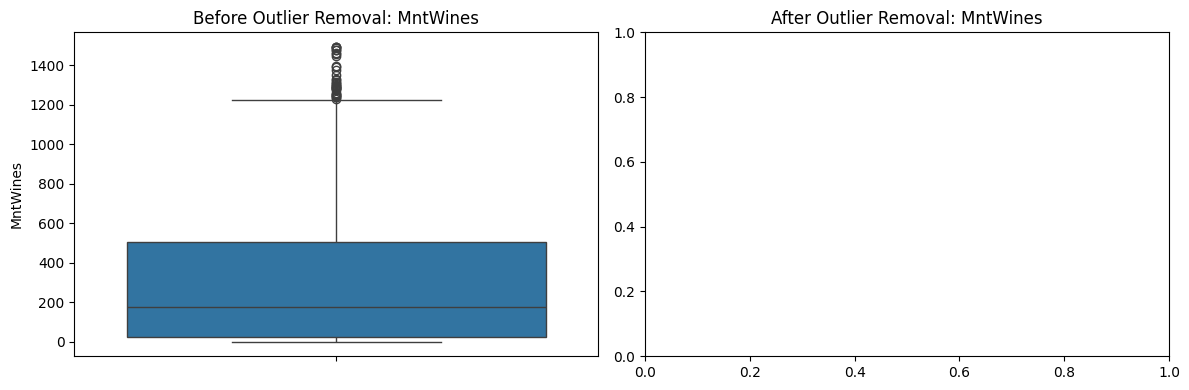

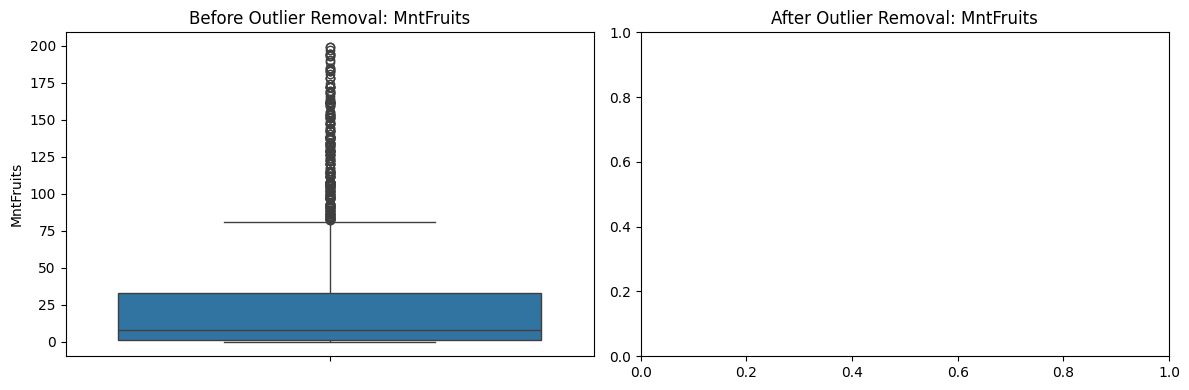

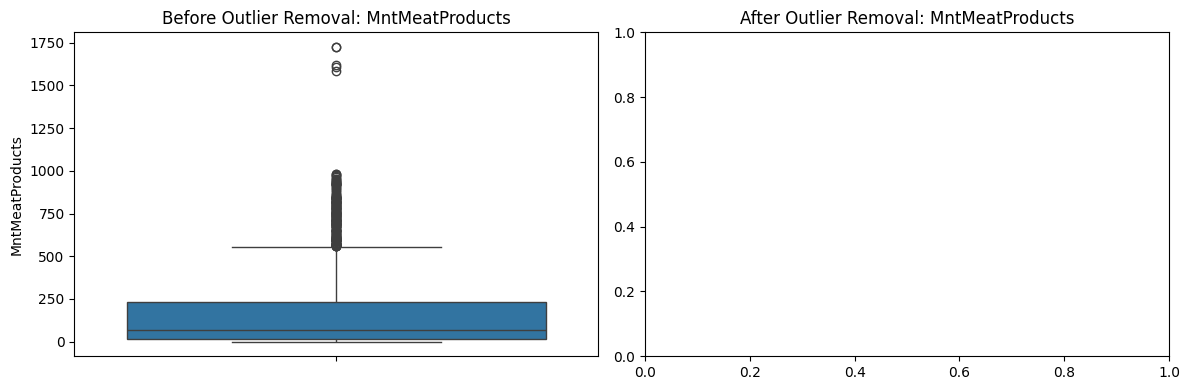

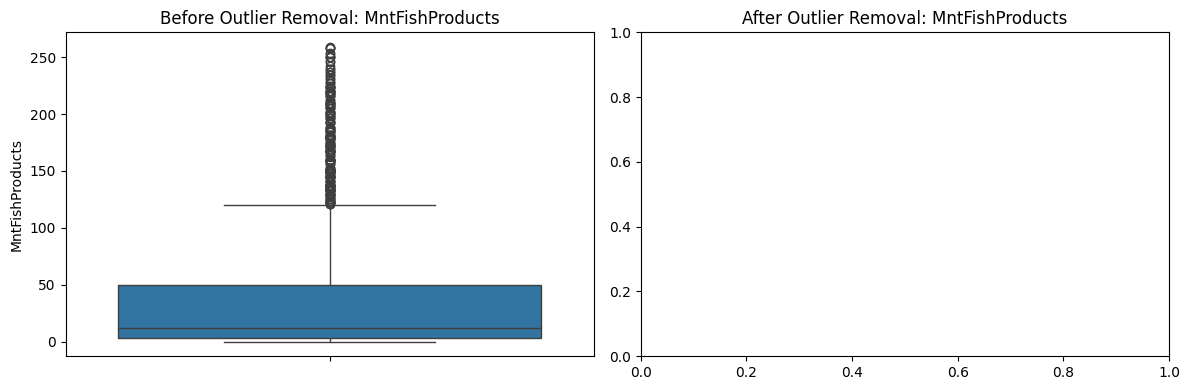

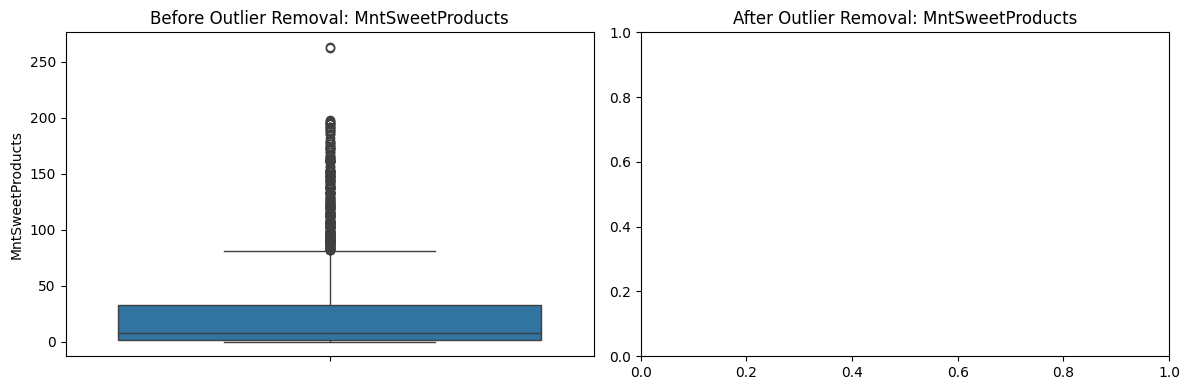

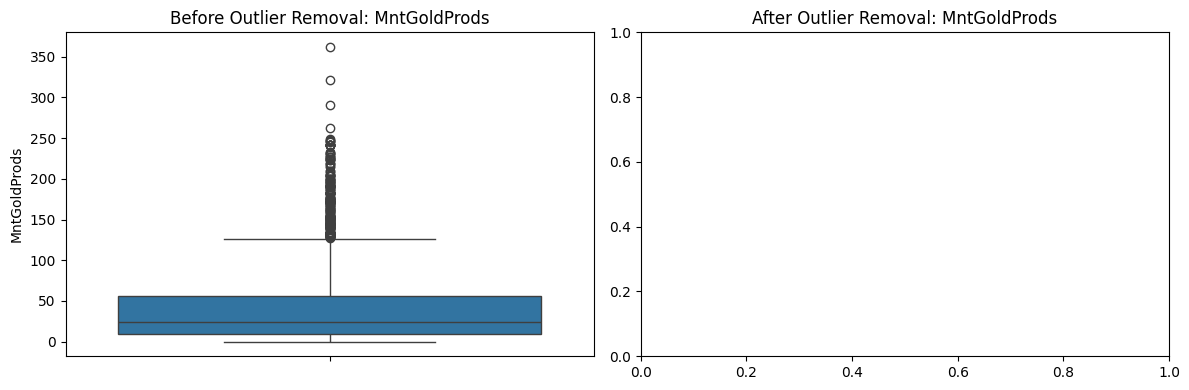

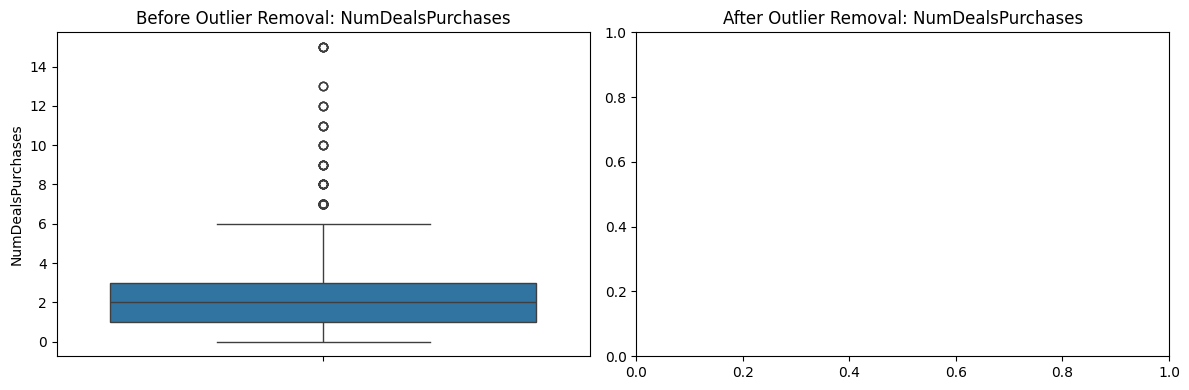

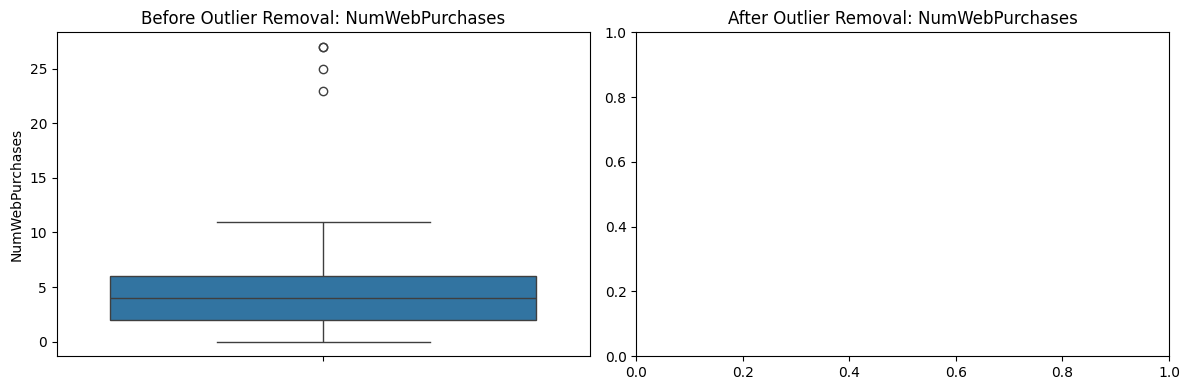

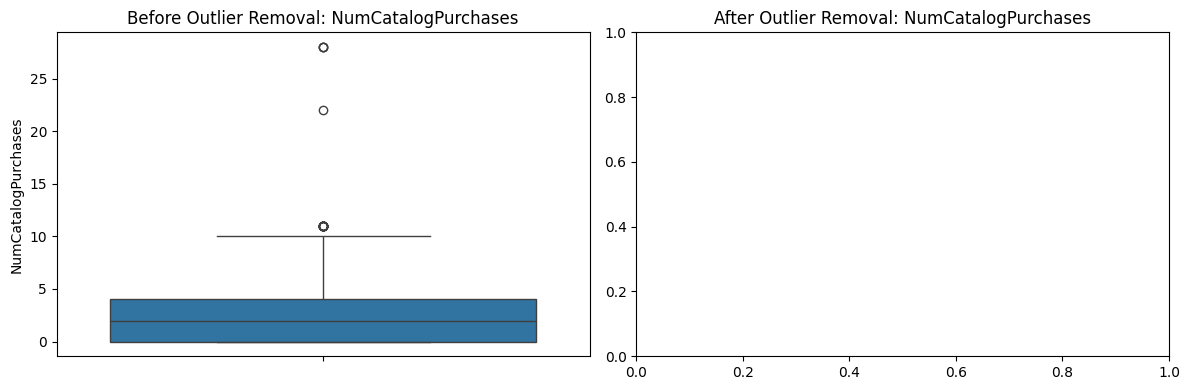

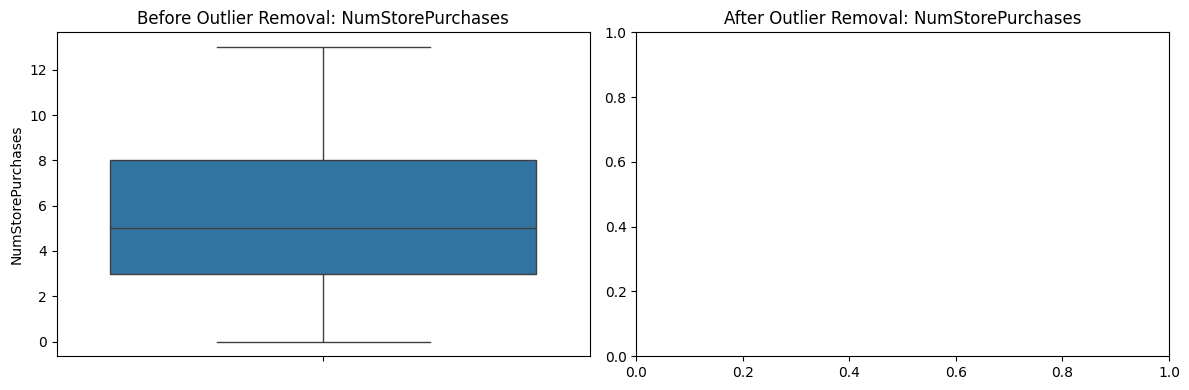

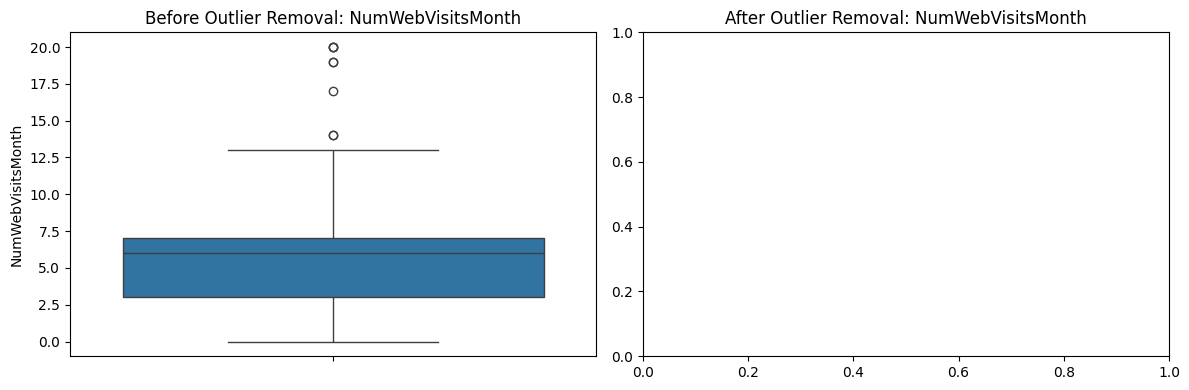

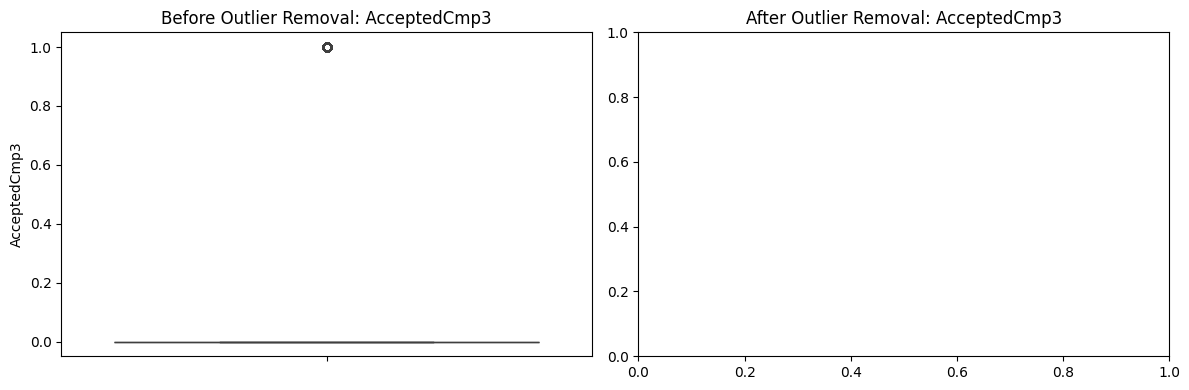

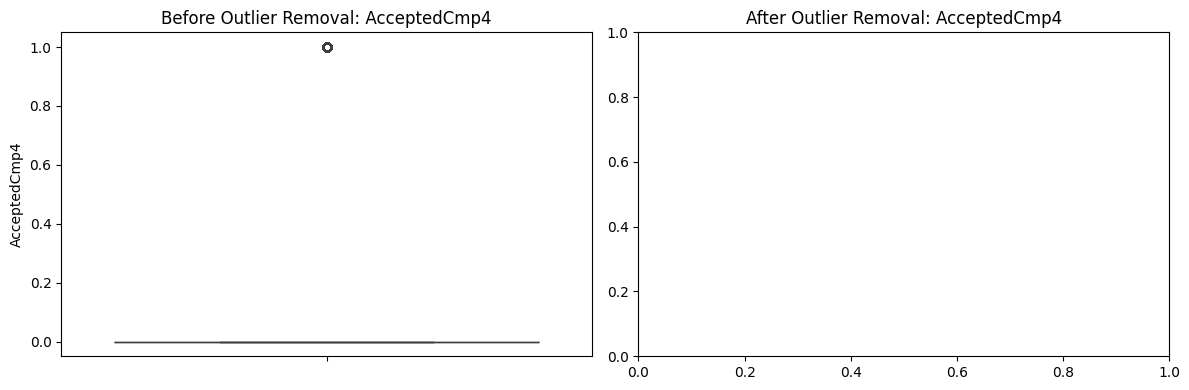

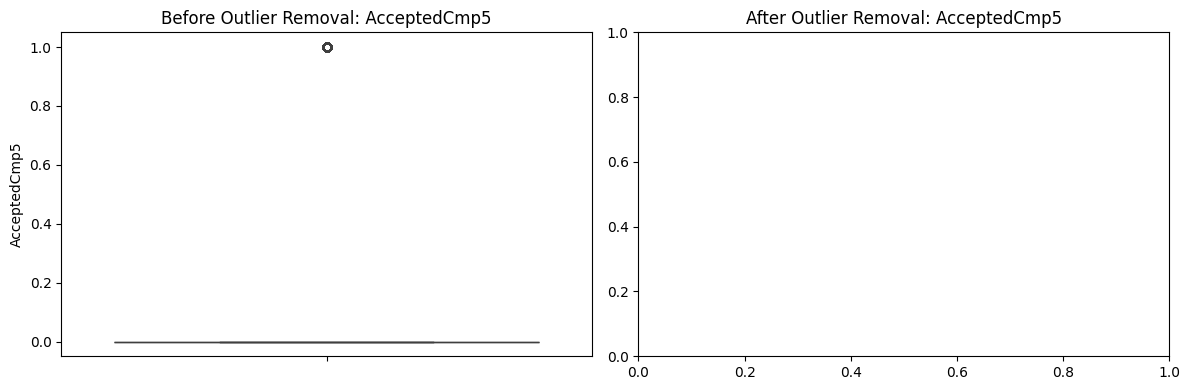

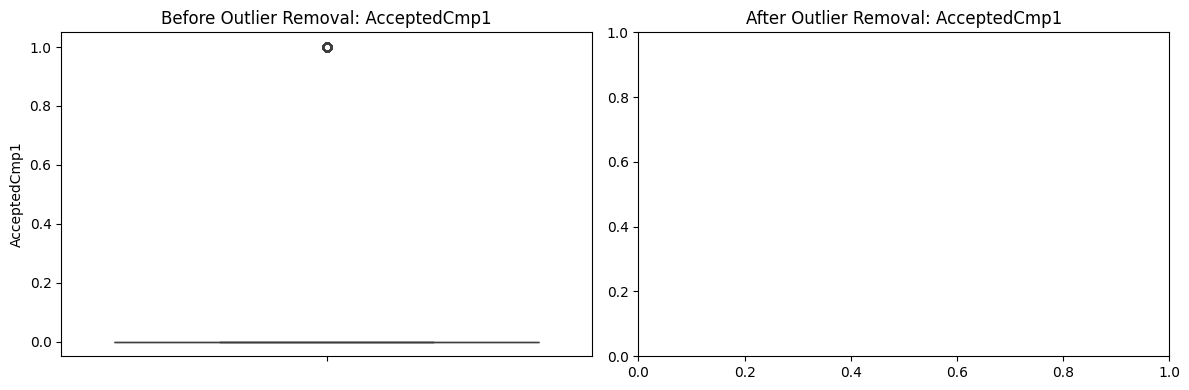

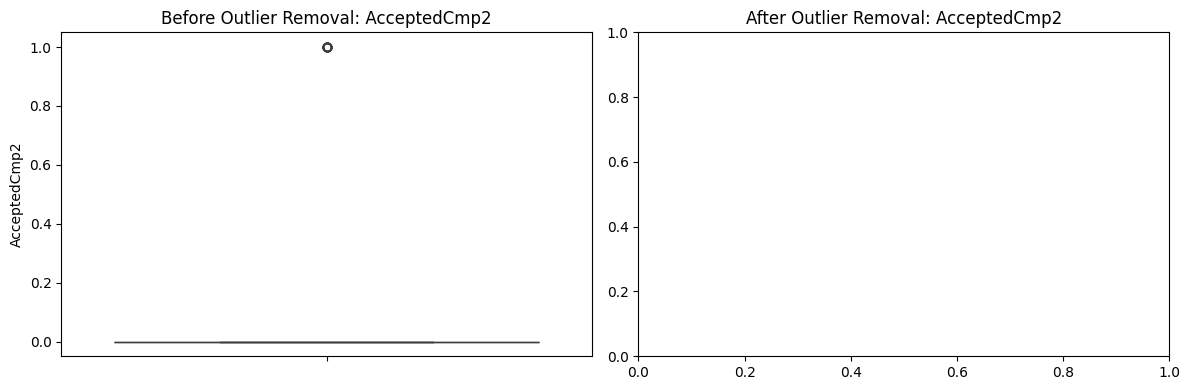

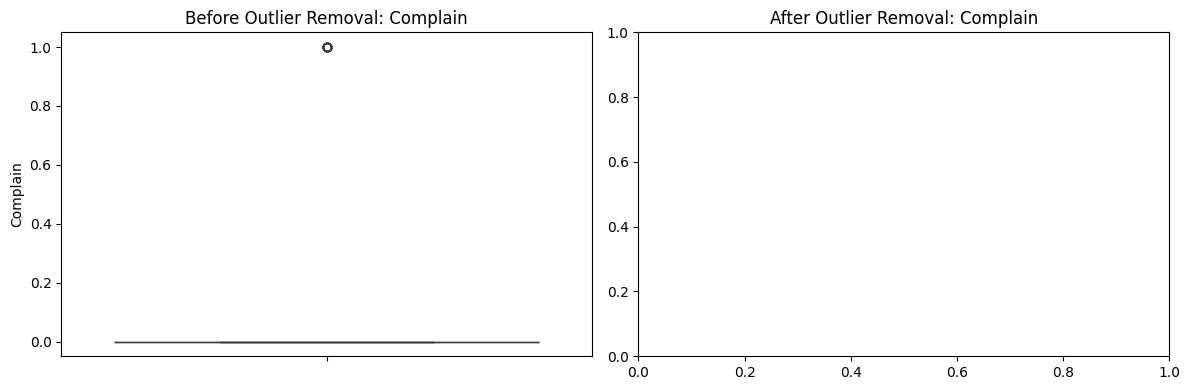

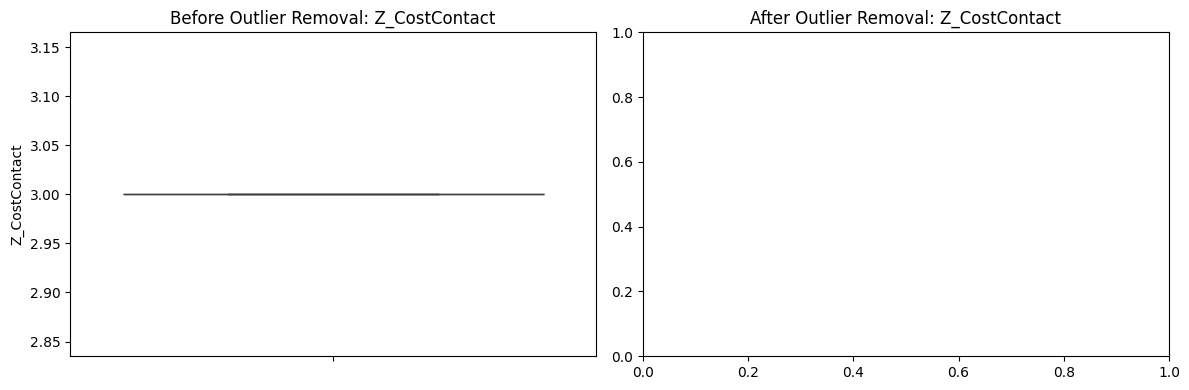

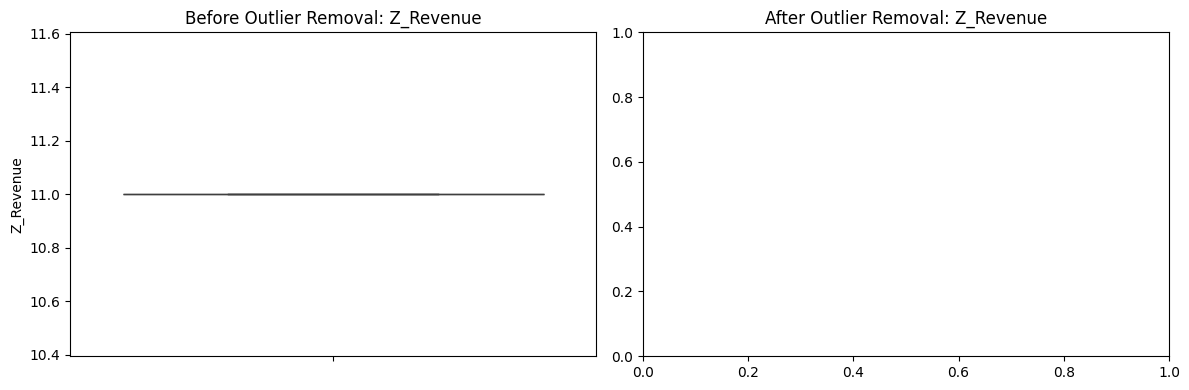

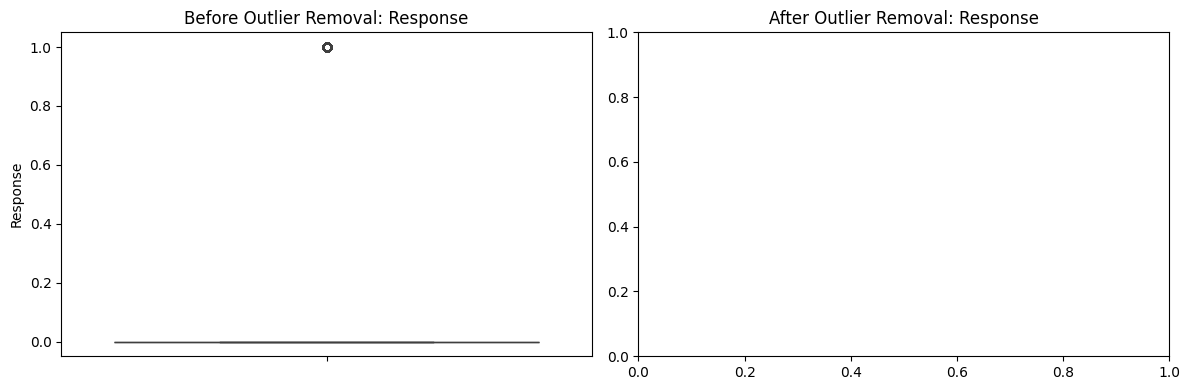

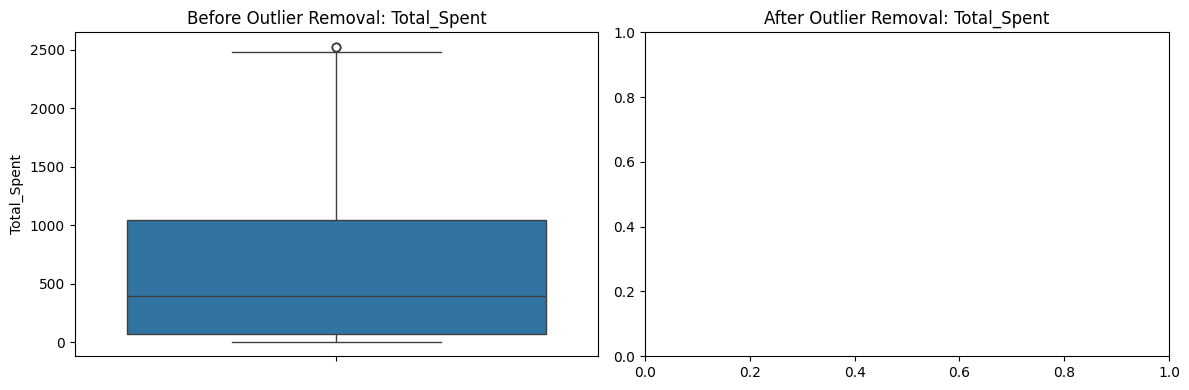

In [15]:

# Boxplot comparison
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(y=df[col], ax=axes[0])
    axes[0].set_title(f'Before Outlier Removal: {col}')
    sns.boxplot(y=df_clean[col], ax=axes[1])
    axes[1].set_title(f'After Outlier Removal: {col}')
    plt.tight_layout()
    plt.show()


**Observation:**

- Z-score method was used to remove outliers (Z > 3).
- This ensures better clustering performance by reducing the influence of extreme values.

In [16]:

# --- Bridge: ensure `df` exists for model cells below ---
try:
    df  # noqa
except NameError:
    # Try to load the common dataset path used in this project
    import pandas as pd
    from pathlib import Path
    path = Path("/mnt/data/marketing_campaign.xlsx")
    if path.exists():
        xls = pd.ExcelFile(path)
        sheet = "marketing_campaign" if "marketing_campaign" in xls.sheet_names else xls.sheet_names[0]
        df = pd.read_excel(path, sheet_name=sheet)
        df.columns = df.columns.astype(str).str.strip()
    else:
        raise NameError("`df` not found and dataset missing. Please run EDA cells that create `df` first.")


# P566 – Model Building (Customer Segmentation)

This notebook performs KMeans clustering on customer data using Age, Income, and Total Spending.

## Step 1: Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import zscore

## Step 2: Load and Preprocess Dataset

In [18]:
# Load the cleaned dataset
import pandas as pd
df = pd.read_csv('Cleaned data.csv')


## Step 3: Feature Selection and Scaling

In [19]:
print(df.columns.tolist())

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Total_Children', 'Total_Spending']


In [20]:
features = df[['Income', 'Total_Spending']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## Step 4: Elbow Method to Determine Optimal k

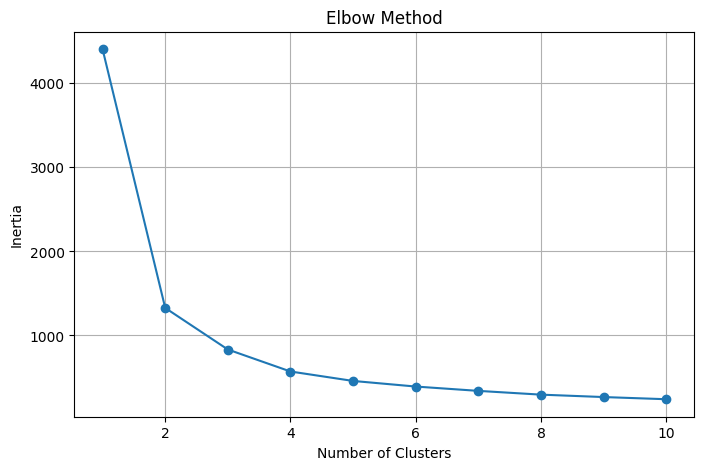

In [21]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## Step 5: Apply KMeans with k=4

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)
df[['Income', 'Total_Spending', 'Cluster']].head()

,Income,Total_Spending,Cluster
0,58138.0,1617,3
1,46344.0,27,0
2,71613.0,776,1
3,26646.0,53,2
4,58293.0,422,0


## Step 6: Cluster Summary

In [23]:
df.groupby('Cluster')[['Age', 'Income', 'Total_Spending']].mean().round(2)

,Age,Income,Total_Spending
Cluster,,,
0,57.87,47810.99,260.25
1,59.26,66187.30,918.04
2,51.51,26818.29,75.24
3,56.97,78907.02,1624.67


## Step 7: Silhouette Score

In [24]:
score = silhouette_score(scaled_features, df['Cluster'])
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.44


## Step 8: Cluster Visualization (PCA 2D)

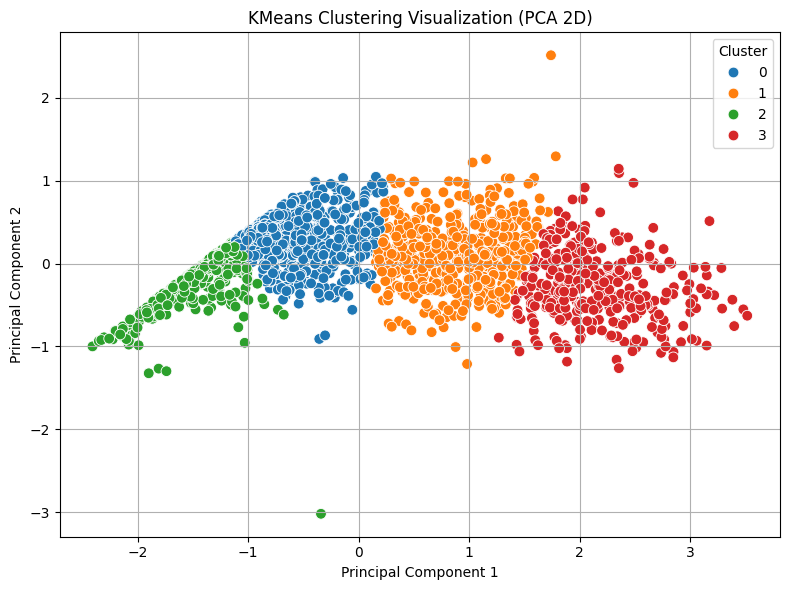

In [25]:
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title('KMeans Clustering Visualization (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Deployment Section**
In this section, we export the trained model, scaler, and features for deployment, and demonstrate how to reload them for predictions.

## Export Trained Artifacts

In [26]:
import joblib, json

# Export trained model, scaler, and features safely
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Ensure features are stored as a list to avoid TypeError
with open("features.json", "w") as f:
    json.dump(list(features), f)

print("Artifacts saved: kmeans_model.pkl, scaler.pkl, features.json")

Artifacts saved: kmeans_model.pkl, scaler.pkl, features.json


## Reload Artifacts for Testing

In [27]:

# Reload artifacts to verify they work correctly
model = joblib.load("kmeans_model.pkl")
scaler = joblib.load("scaler.pkl")
with open("features.json") as f:
    features = json.load(f)

print("Artifacts reloaded successfully!")
print("Features used for prediction:", features)


Artifacts reloaded successfully!
Features used for prediction: ['Income', 'Total_Spending']


## Cluster Profiling (Inverse-Transformed Centers)

In [28]:

# Get cluster centers in original scale
centers_scaled = model.cluster_centers_
try:
    centers_orig = scaler.inverse_transform(centers_scaled)
except Exception as e:
    print("Scaler inverse_transform failed, showing scaled centers:", e)
    centers_orig = centers_scaled

import pandas as pd
cluster_profile = pd.DataFrame(centers_orig, columns=features)
cluster_profile.index = [f"Cluster {i}" for i in range(cluster_profile.shape[0])]
display(cluster_profile.round(2))


,Income,Total_Spending
Cluster 0,47790.88,259.86
Cluster 1,66177.06,917.30
Cluster 2,26818.29,75.24
Cluster 3,78907.02,1624.67


### Visualization: Cluster Centers

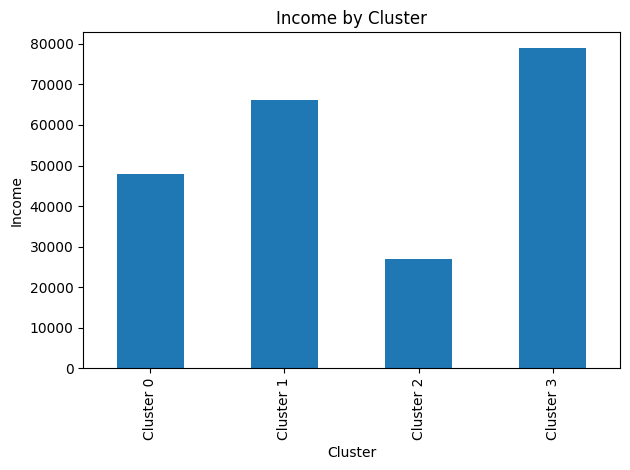

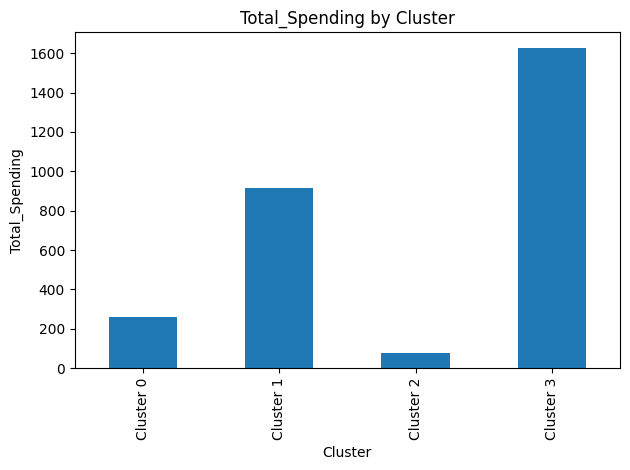

In [29]:

import matplotlib.pyplot as plt

for col in cluster_profile.columns:
    plt.figure()
    cluster_profile[col].plot(kind="bar", title=f"{col} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


## Sample Prediction

In [30]:

import pandas as pd

# Provide a sample input using the same features
sample_input = pd.DataFrame([{
    features[0]: 60000,
    features[1]: 1500
}])[features]

# Scale and predict
Xs = scaler.transform(sample_input)
pred = model.predict(Xs)[0]
print("Predicted Segment:", pred)


Predicted Segment: 3


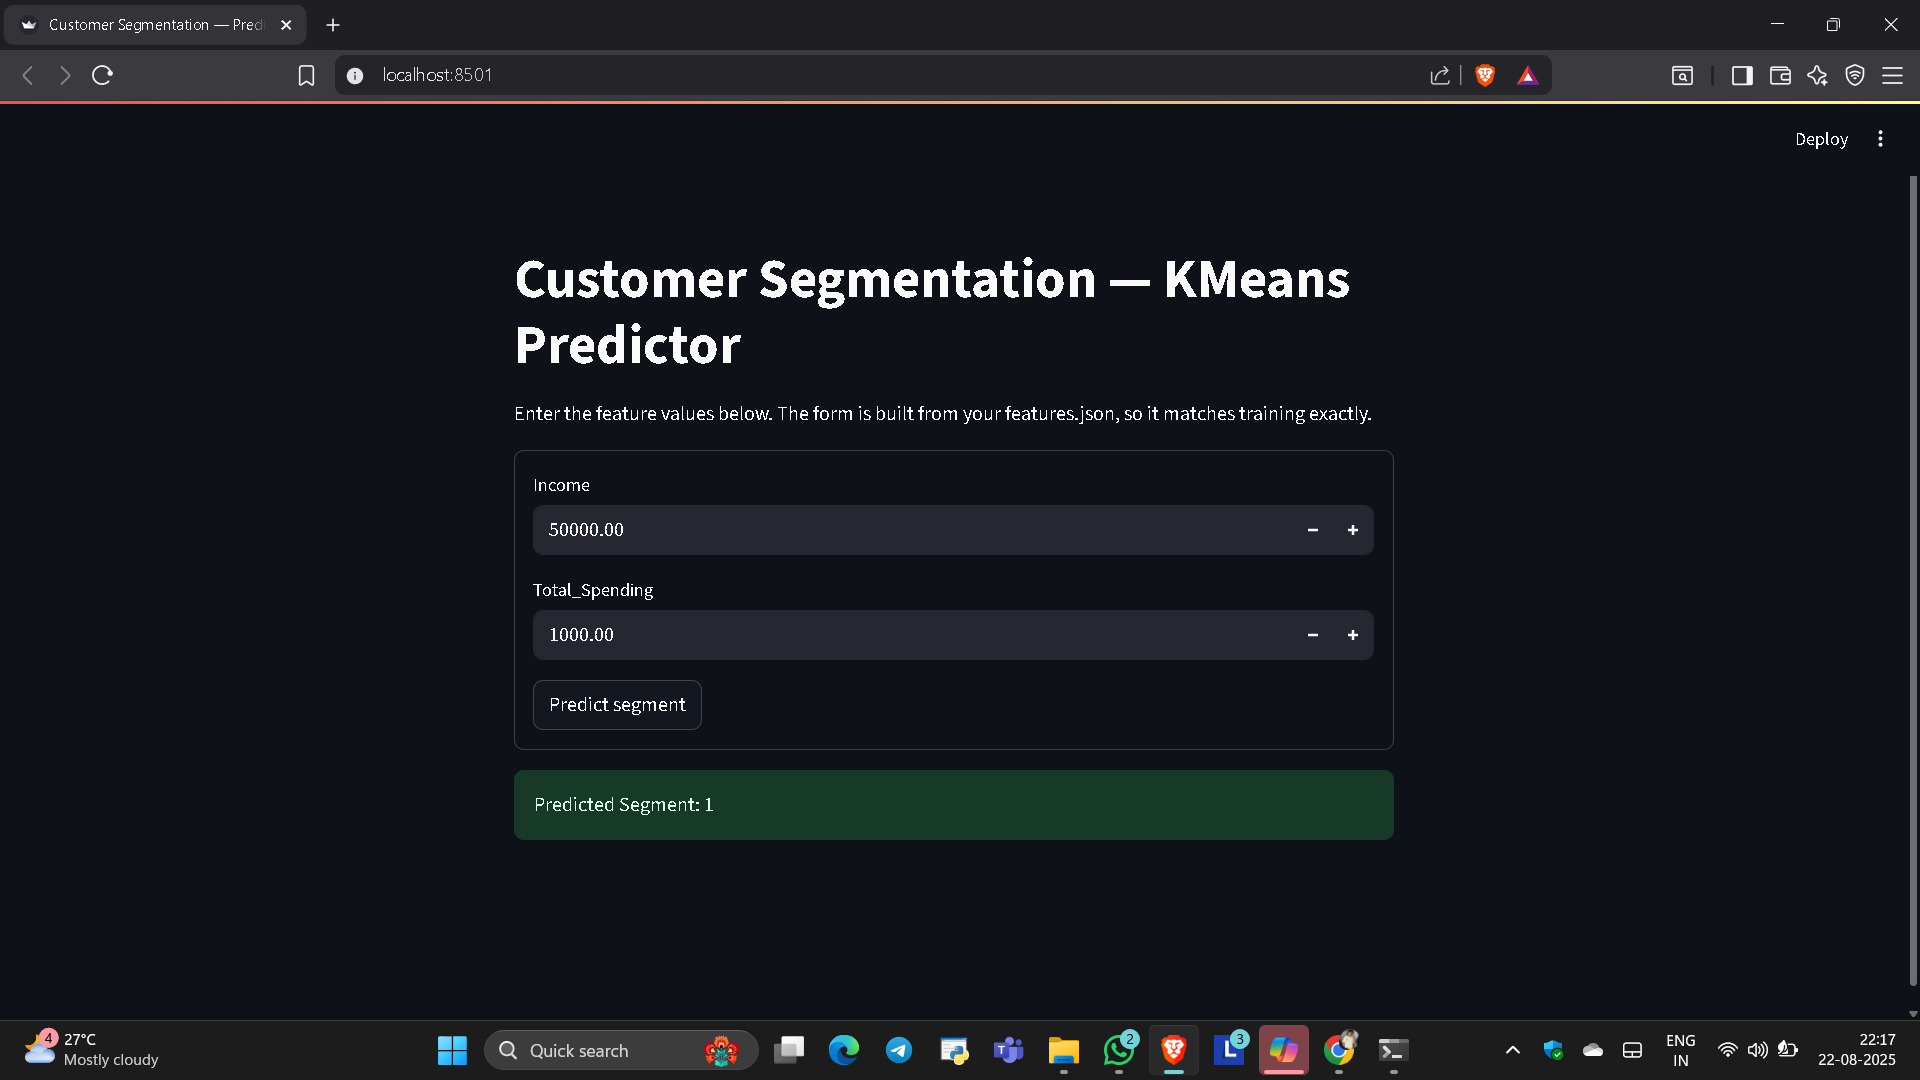

In [32]:
from IPython.display import Image
Image("app_prediction.png")